In [1]:
import os
import pandas as pd
import numpy as np

# Reading data from a .csv file using Pandas function read_csv
data = pd.read_csv("D:\Advanced Programming for Business Analytics\TESCO\content_train_TESCO.csv")

# Print first 5 elements of the table
data.head()

,customer.id,content_1,content_2,content_3,content_4,content_5,content_6,content_7,content_8,content_9,...,extra.total.spend,fandf.no.transactions,fandf.total.spend,petrol.no.transactions,petrol.total.spend,direct.no.transactions,direct.total.spend,gender,affluency,county
0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,634.11,14,76.12,32,753.12,10,617.47,Female,Mid,Surrey
1,2,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,...,679.78,13,142.74,28,37.86,51,2787.49,Female,Mid,Greater Manchester
2,3,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,...,282.90,7,672.12,55,563.12,4,444.34,Female,Low,Greater Manchester
3,4,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,...,5954.89,49,2394.10,56,912.70,24,5859.31,Male,Mid,Brighton & Hove
4,5,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,...,3170.40,27,651.36,52,925.30,17,433.57,Female,Low,Norfolk


In [2]:
# Statistical Summary of the data
data.describe()

,customer.id,content_1,content_2,content_3,content_4,content_5,content_6,content_7,content_8,content_9,...,superstore.no.transactions,superstore.total.spend,extra.no.transactions,extra.total.spend,fandf.no.transactions,fandf.total.spend,petrol.no.transactions,petrol.total.spend,direct.no.transactions,direct.total.spend
count,100000.000000,46022.000000,42958.000000,27314.000000,38079.000000,44830.000000,49706.000000,38196.000000,38346.000000,48025.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,0.010908,0.011849,0.035696,0.028782,0.017689,0.003138,0.005262,0.005476,0.007267,...,50.015830,2822.343985,49.865100,2819.090342,30.488380,1043.523380,30.501310,575.158719,30.486420,2823.463322
std,28867.657797,0.103870,0.108207,0.185534,0.167196,0.131820,0.055934,0.072352,0.073801,0.084938,...,19.042166,3358.896270,19.046875,3365.456654,18.195708,1399.247044,18.185019,787.837342,18.219828,3769.475756
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,37.000000,758.167500,37.000000,757.767500,17.000000,190.377500,17.000000,106.067500,17.000000,518.025000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.000000,1792.480000,50.000000,1786.700000,30.000000,586.435000,30.000000,323.575000,30.000000,1577.880000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,3660.350000,63.000000,3652.777500,43.000000,1356.305000,43.000000,738.950000,43.000000,3670.920000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,133.000000,73988.490000,148.000000,82972.690000,116.000000,40018.310000,124.000000,24556.450000,118.000000,76195.410000


In [3]:
# Creating a subset of data, containing only Marketing Content 1 Cards

# Drop all NA row values from content_1 column. This is done because NA here means the Marketing Content 1 card was not
# displayed to the customer, and thus that row will not add any information to our model for prediction.
C1 = data.dropna(subset = ["content_1"])

# Dropping all the other Marketing Card columns, except content_1
C1 = C1.drop(["content_2", "content_3","content_4","content_5","content_6","content_7","content_8","content_9"], axis = 1)
C1.reset_index(drop=True, inplace=True)

# Display first 5 rows from the new data frame C1
C1.head()

# Aggregating rows
C1['No.Of.Transactions'] = C1['extra.no.transactions'] + C1['express.no.transactions'] + C1['metro.no.transactions'] 
+ C1['superstore.no.transactions']  + C1['fandf.no.transactions'] + C1['petrol.no.transactions'] + C1['direct.no.transactions']

C1.head()

C1['Total.Spend'] = C1['express.total.spend'] + C1['metro.total.spend'] + C1['superstore.total.spend'] 
+ C1['extra.total.spend']  + C1['fandf.total.spend'] + C1['petrol.total.spend'] + C1['direct.total.spend']

C1.head()

,customer.id,content_1,express.no.transactions,express.total.spend,metro.no.transactions,metro.total.spend,superstore.no.transactions,superstore.total.spend,extra.no.transactions,extra.total.spend,...,fandf.total.spend,petrol.no.transactions,petrol.total.spend,direct.no.transactions,direct.total.spend,gender,affluency,county,No.Of.Transactions,Total.Spend
0,3,0.0,44,66.96,68,1766.38,50,2609.10,78,282.90,...,672.12,55,563.12,4,444.34,Female,Low,Greater Manchester,190,4442.44
1,5,0.0,38,143.67,39,601.60,39,856.57,52,3170.40,...,651.36,52,925.30,17,433.57,Female,Low,Norfolk,129,1601.84
2,6,0.0,28,367.26,57,130.24,29,671.60,18,204.80,...,1847.33,45,184.21,26,1461.01,Male,Very Low,West Yorkshire,103,1169.10
3,8,0.0,47,186.19,82,263.43,56,274.20,87,14829.60,...,2173.71,25,376.18,58,12781.38,Male,High,Tyne and Wear,216,723.82
4,10,0.0,56,1947.77,45,2460.47,51,9436.17,33,573.02,...,0.00,0,0.00,32,3342.85,Female,Very High,County Durham,134,13844.41


In [4]:
# Checking for missing data:

total = C1.isnull().sum().sort_values(ascending=False)
percent = (C1.isnull().sum()/C1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Total.Spend,0,0.0
extra.total.spend,0,0.0
content_1,0,0.0
express.no.transactions,0,0.0
express.total.spend,0,0.0
metro.no.transactions,0,0.0
metro.total.spend,0,0.0
superstore.no.transactions,0,0.0
superstore.total.spend,0,0.0
extra.no.transactions,0,0.0


In [5]:
# Checking the datatype of the fields in our table:
C1.dtypes

customer.id                     int64
content_1                     float64
express.no.transactions         int64
express.total.spend           float64
metro.no.transactions           int64
metro.total.spend             float64
superstore.no.transactions      int64
superstore.total.spend        float64
extra.no.transactions           int64
extra.total.spend             float64
fandf.no.transactions           int64
fandf.total.spend             float64
petrol.no.transactions          int64
petrol.total.spend            float64
direct.no.transactions          int64
direct.total.spend            float64
gender                         object
affluency                      object
county                         object
No.Of.Transactions              int64
Total.Spend                   float64
dtype: object

In [6]:
# Changing the datatype of content_1 to int
C1 = C1.astype({"content_1": int})
C1.dtypes

customer.id                     int64
content_1                       int32
express.no.transactions         int64
express.total.spend           float64
metro.no.transactions           int64
metro.total.spend             float64
superstore.no.transactions      int64
superstore.total.spend        float64
extra.no.transactions           int64
extra.total.spend             float64
fandf.no.transactions           int64
fandf.total.spend             float64
petrol.no.transactions          int64
petrol.total.spend            float64
direct.no.transactions          int64
direct.total.spend            float64
gender                         object
affluency                      object
county                         object
No.Of.Transactions              int64
Total.Spend                   float64
dtype: object

In [7]:
# Converting categorical field gender into numerical data, as prediction algorithms cannot run on categorical data.

# Since there are only two types of Gender here, and we do not want use of numeric values to be misinterpreted by our
# prediction algorithms, we use One Hot Encoding to convert categorical gender into numerical data.

C1 = pd.get_dummies(C1, columns=["gender"], prefix = ["Gender"])
C1.head()

,customer.id,content_1,express.no.transactions,express.total.spend,metro.no.transactions,metro.total.spend,superstore.no.transactions,superstore.total.spend,extra.no.transactions,extra.total.spend,...,petrol.no.transactions,petrol.total.spend,direct.no.transactions,direct.total.spend,affluency,county,No.Of.Transactions,Total.Spend,Gender_Female,Gender_Male
0,3,0,44,66.96,68,1766.38,50,2609.10,78,282.90,...,55,563.12,4,444.34,Low,Greater Manchester,190,4442.44,1,0
1,5,0,38,143.67,39,601.60,39,856.57,52,3170.40,...,52,925.30,17,433.57,Low,Norfolk,129,1601.84,1,0
2,6,0,28,367.26,57,130.24,29,671.60,18,204.80,...,45,184.21,26,1461.01,Very Low,West Yorkshire,103,1169.10,0,1
3,8,0,47,186.19,82,263.43,56,274.20,87,14829.60,...,25,376.18,58,12781.38,High,Tyne and Wear,216,723.82,0,1
4,10,0,56,1947.77,45,2460.47,51,9436.17,33,573.02,...,0,0.00,32,3342.85,Very High,County Durham,134,13844.41,1,0


In [8]:
# Converting categorical field affluency into numerical data, as prediction algorithms cannot run on categorical data.

# Since there are 5 types of affluency depicting a range from Very Low to Very High, we use labels from 0 to 4 to depict these.

C1["affluency"] = C1["affluency"].astype('category')
C1["affluency_cat"] = C1["affluency"].cat.codes
C1 = C1.drop(["affluency"], axis = 1)
C1.head()

,customer.id,content_1,express.no.transactions,express.total.spend,metro.no.transactions,metro.total.spend,superstore.no.transactions,superstore.total.spend,extra.no.transactions,extra.total.spend,...,petrol.no.transactions,petrol.total.spend,direct.no.transactions,direct.total.spend,county,No.Of.Transactions,Total.Spend,Gender_Female,Gender_Male,affluency_cat
0,3,0,44,66.96,68,1766.38,50,2609.10,78,282.90,...,55,563.12,4,444.34,Greater Manchester,190,4442.44,1,0,1
1,5,0,38,143.67,39,601.60,39,856.57,52,3170.40,...,52,925.30,17,433.57,Norfolk,129,1601.84,1,0,1
2,6,0,28,367.26,57,130.24,29,671.60,18,204.80,...,45,184.21,26,1461.01,West Yorkshire,103,1169.10,0,1,4
3,8,0,47,186.19,82,263.43,56,274.20,87,14829.60,...,25,376.18,58,12781.38,Tyne and Wear,216,723.82,0,1,0
4,10,0,56,1947.77,45,2460.47,51,9436.17,33,573.02,...,0,0.00,32,3342.85,County Durham,134,13844.41,1,0,3


In [9]:
# Converting categorical field county into numerical data, as prediction algorithms cannot run on categorical data.

# As there are 90 counties, we use label encoding to encode the categorical data into numerical data.

C1["county"] = C1["county"].astype('category')
C1["county_cat"] = C1["county"].cat.codes
C1 = C1.drop(["county"], axis = 1)
C1.head()

,customer.id,content_1,express.no.transactions,express.total.spend,metro.no.transactions,metro.total.spend,superstore.no.transactions,superstore.total.spend,extra.no.transactions,extra.total.spend,...,petrol.no.transactions,petrol.total.spend,direct.no.transactions,direct.total.spend,No.Of.Transactions,Total.Spend,Gender_Female,Gender_Male,affluency_cat,county_cat
0,3,0,44,66.96,68,1766.38,50,2609.10,78,282.90,...,55,563.12,4,444.34,190,4442.44,1,0,1,26
1,5,0,38,143.67,39,601.60,39,856.57,52,3170.40,...,52,925.30,17,433.57,129,1601.84,1,0,1,45
2,6,0,28,367.26,57,130.24,29,671.60,18,204.80,...,45,184.21,26,1461.01,103,1169.10,0,1,4,84
3,8,0,47,186.19,82,263.43,56,274.20,87,14829.60,...,25,376.18,58,12781.38,216,723.82,0,1,0,78
4,10,0,56,1947.77,45,2460.47,51,9436.17,33,573.02,...,0,0.00,32,3342.85,134,13844.41,1,0,3,14


In [50]:
# Dividing the data into Input variables(X) and Output(Y)

C1_X = C1.iloc[:, 2:]
C1_Y = C1["content_1"]
C1_X.head()

,express.no.transactions,express.total.spend,metro.no.transactions,metro.total.spend,superstore.no.transactions,superstore.total.spend,extra.no.transactions,extra.total.spend,fandf.no.transactions,fandf.total.spend,petrol.no.transactions,petrol.total.spend,direct.no.transactions,direct.total.spend,No.Of.Transactions,Total.Spend,Gender_Female,Gender_Male,affluency_cat,county_cat
0,44,66.96,68,1766.38,50,2609.10,78,282.90,7,672.12,55,563.12,4,444.34,190,4442.44,1,0,1,26
1,38,143.67,39,601.60,39,856.57,52,3170.40,27,651.36,52,925.30,17,433.57,129,1601.84,1,0,1,45
2,28,367.26,57,130.24,29,671.60,18,204.80,63,1847.33,45,184.21,26,1461.01,103,1169.10,0,1,4,84
3,47,186.19,82,263.43,56,274.20,87,14829.60,18,2173.71,25,376.18,58,12781.38,216,723.82,0,1,0,78
4,56,1947.77,45,2460.47,51,9436.17,33,573.02,0,0.00,0,0.00,32,3342.85,134,13844.41,1,0,3,14


In [51]:
# Splitting data into train and test data points

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(C1_X, C1_Y, test_size=0.7, random_state = 27)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13806, 20) (13806,)
(32216, 20) (32216,)


In [48]:
# Feature Selection using Univariate Selection

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  

                     Specs         Score
13      direct.total.spend  10929.596450
7        extra.total.spend  10856.121287
1      express.total.spend   2016.348672
15             Total.Spend   1603.725563
5   superstore.total.spend   1368.461583
11      petrol.total.spend   1171.784607
3        metro.total.spend    175.152648
8    fandf.no.transactions     21.029391
14      No.Of.Transactions     19.400698
10  petrol.no.transactions     18.214048


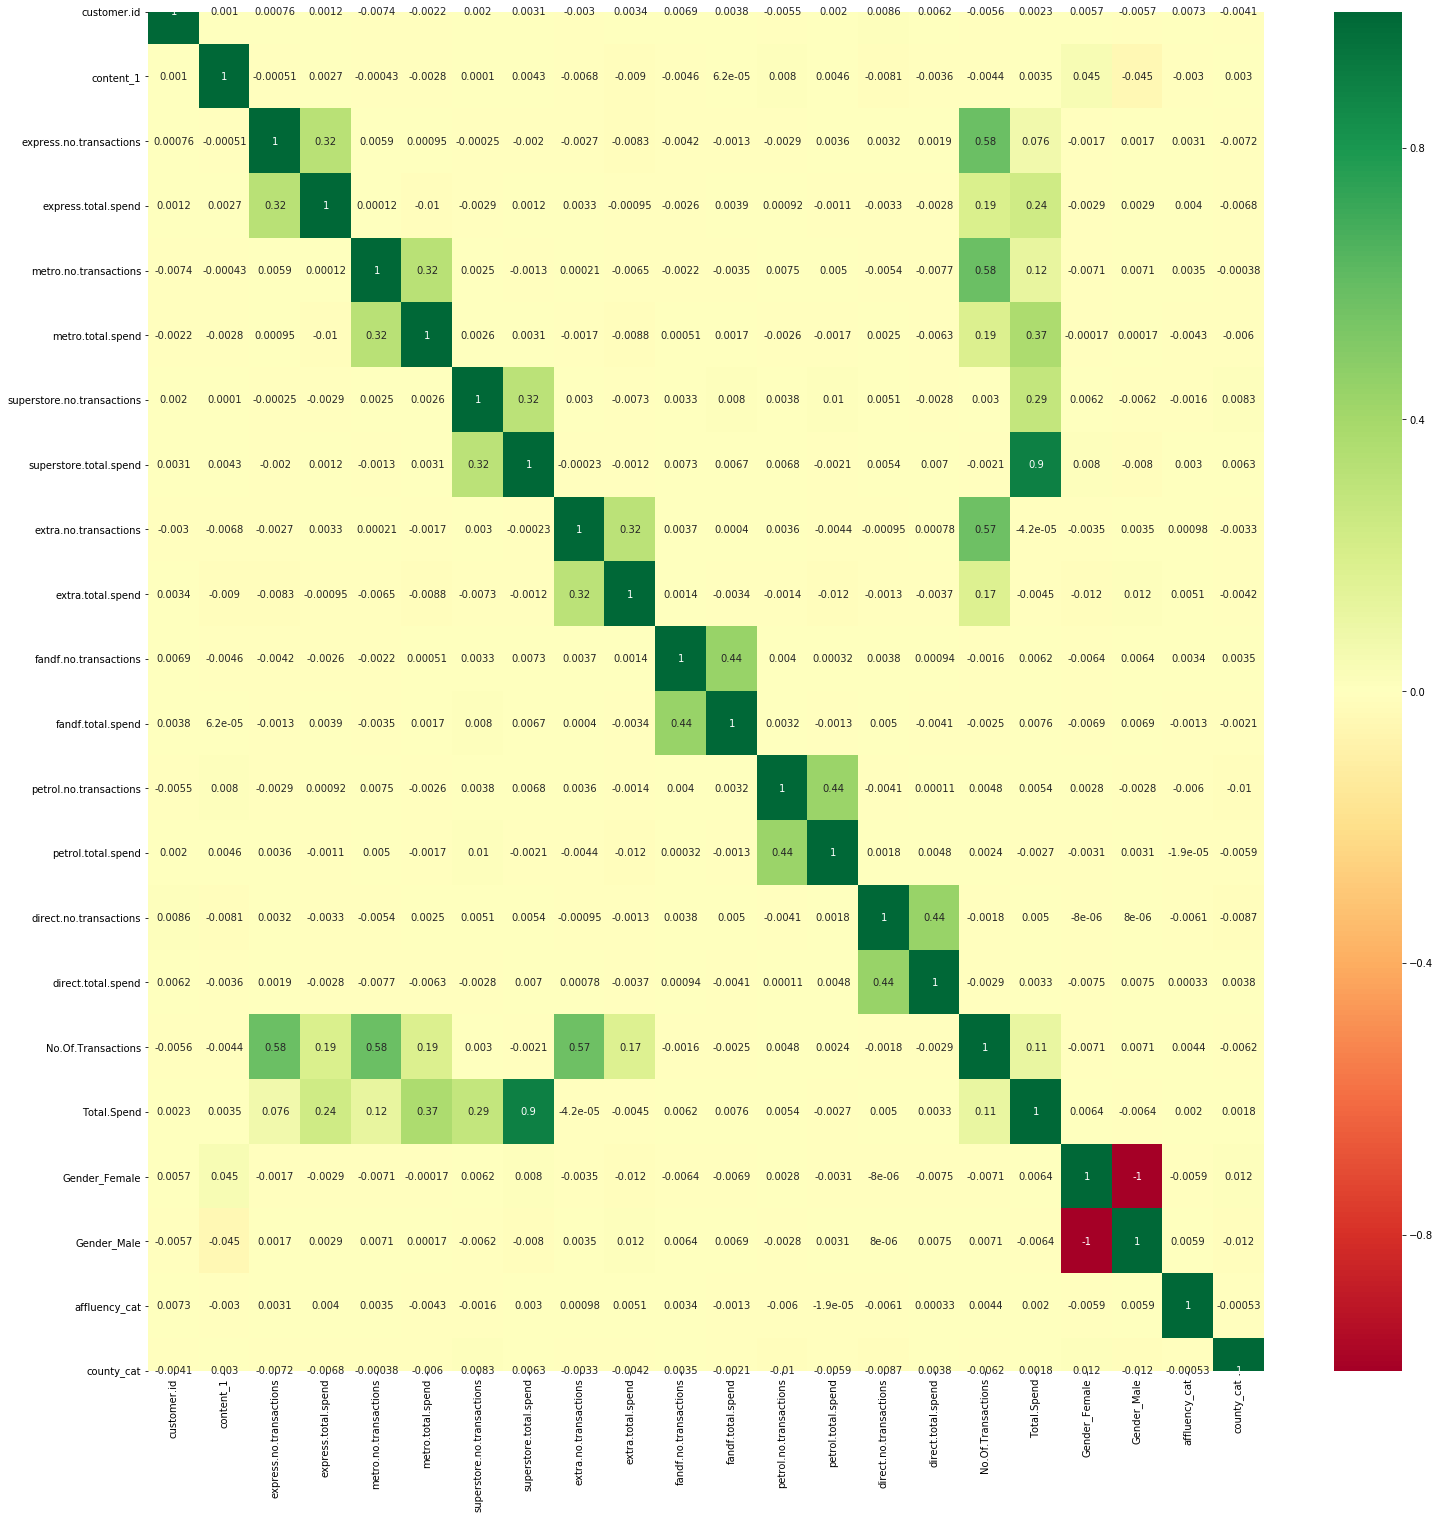

In [43]:
# Feature Selection using Correlation Heat Maps

import pandas as pd
import numpy as np
import seaborn as sns

corrmat = C1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))

g=sns.heatmap(C1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

[0.05449549 0.06041063 0.05709325 0.05691559 0.05745884 0.0587388
 0.05526127 0.05435968 0.05691605 0.05651353 0.0592937  0.05705035
 0.0528863  0.05417905 0.05536787 0.05609123 0.00208331 0.00183469
 0.03464115 0.05840923]


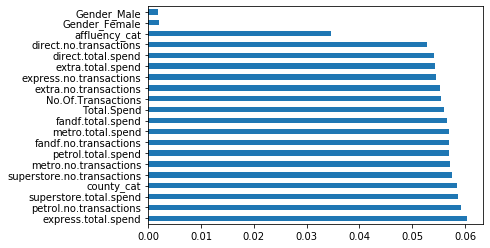

In [52]:
# Feature Selection using Feature importance property of the model

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [19]:
# Resampling - Oversampling minority class

from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

no = X[X.content_1==0]
yes = X[X.content_1==1]

n_upsampled = resample(yes,
                          replace=True, 
                          n_samples=len(no), 
                          random_state=27)

upsampled = pd.concat([no, n_upsampled])

# check new class counts
print(upsampled.content_1.value_counts())

y_train = upsampled.content_1
X_train = upsampled.drop('content_1', axis=1)

1    13663
0    13663
Name: content_1, dtype: int64


In [20]:
# Training and fitting Decision Tree Classifier model on to the training data.

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
model = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions[0:100]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
# Creating a confusion matrix to determine the accuracy and precision of the model:

from sklearn.metrics import confusion_matrix
original = np.array(y_test)
prediction = np.array(predictions)
confusion_matrix(original, prediction)

array([[31496,   361],
       [  353,     6]], dtype=int64)

In [22]:
# Calculating metrics like precision, acciracy, F1 measure, etc.

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(original,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31857
           1       0.02      0.02      0.02       359

    accuracy                           0.98     32216
   macro avg       0.50      0.50      0.50     32216
weighted avg       0.98      0.98      0.98     32216



In [36]:
# Oversampling with SMOTE

from imblearn.over_sampling import SMOTE

C1_X = C1.iloc[:, 2:18]
C1_Y = C1["content_1"]
C1_X.head()

X_train, X_test, y_train, y_test = train_test_split(C1_X, C1_Y, test_size=0.75, random_state = 27)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

(11505, 16) (11505,)
(34517, 16) (34517,)


In [37]:
# Training and fitting Decision Tree Classifier model on to the training data.

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
model = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions[0:100]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
# Creating a confusion matrix to determine the accuracy and precision of the model:

from sklearn.metrics import confusion_matrix
original = np.array(y_test)
prediction = np.array(predictions)
confusion_matrix(original, prediction)

array([[31637,  2494],
       [  358,    28]], dtype=int64)

In [39]:
# Calculating metrics like precision, acciracy, F1 measure, etc.

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(original,prediction))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     34131
           1       0.01      0.07      0.02       386

    accuracy                           0.92     34517
   macro avg       0.50      0.50      0.49     34517
weighted avg       0.98      0.92      0.95     34517

